In [1]:
#first we download data set
from scipy.io import loadmat
import matplotlib
import matplotlib.pyplot as plt
mnist_raw = loadmat("mnist-original.mat")
X = mnist_raw['data'].T
Y = mnist_raw['label'].T

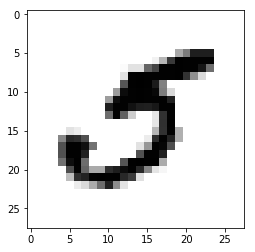

In [2]:
%matplotlib inline
some_digit = X[36000]
plt.imshow(some_digit.reshape(28,28), cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

In [3]:
#split them into training set and test set
x_train, y_train, x_test, y_test = X[:60000], Y[:60000], X[60000:], Y[60000:]

In [4]:
#shuffle training set to make sure that when you do cross-validation on training set each fold will have similar ratio of digits
import numpy as np
shuffled_indices = np.random.permutation(60000)
x_train, y_train = x_train[shuffled_indices], y_train[shuffled_indices]

In [5]:
#Binary Classification
#create new target variable indicate that digits is 5 or not
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [6]:
#train binary classifier using SGDClassifier 
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)
sgd_clf.predict([some_digit])

/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([False])

In [7]:
#measure model's performance
from sklearn.model_selection import cross_val_score
#use accuracy
sgd_scores = cross_val_score(SGDClassifier(random_state=42), x_train, y_train_5, scoring='accuracy', cv=3)
sgd_scores

/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19.

array([0.9549 , 0.96845, 0.9709 ])

In [8]:
#it seems like model doing pretty good on validation sets

In [9]:
#let create dummy model that always classify every images as 'not-5'
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [10]:
#let see the accuracy of Never5Classifier
never_5_scores = cross_val_score(Never5Classifier(), x_train, y_train_5, cv=3, scoring='accuracy')
never_5_scores

array([0.9054 , 0.91235, 0.9112 ])

In [11]:
#90% accuracy!!! this is because there are only about 10% of training set are 5s (90% of training set are 'not-5')
#this mean accuracy is not the best performance metric,
#especially when your data set is skewed (when some classes are much more frequent than others)

In [12]:
#Better evaluation using 'Confusion Matrix'

In [13]:
#first you need predictions of every image in training set
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(SGDClassifier(random_state=42), x_train, y_train_5, cv=3)

#then you compute confusion matrix
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train_5, y_pred)
conf_mx

/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19.

array([[53912,   667],
       [ 1448,  3973]])

In [14]:
#in confusion matrix rows represent actual classes and columns represent predicted classes
#from previous confusion matrix there are 53699 TN, 880 FP, 2018 FN, 3403 TP

In [15]:
#next let look at precision score 
#precision score is #TP / #TP + #FP
#precision means 'how often your model classify as positive correctly'
from sklearn.metrics import precision_score
precision_score(y_train_5, y_pred)

0.85625

In [16]:
#next let see its recall score
#recall is #TP / #actual Positive (TP + FN)
#recall means 'how many Positive your model cal find correctly'
from sklearn.metrics import recall_score
recall_score(y_train_5, y_pred)

0.7328906105884523

In [17]:
#next let see its F1 score
#F1 score combine both precision and recall into single metric 
#F1 score is hamonic mean of precision and recall. when regular mean give weight to eaceh value equally, 
#hamonic mean give more wieght on small value, as a result F1 score will be high only if both values are high
from sklearn.metrics import f1_score
f1_score(y_train_5, y_pred)

0.7897823278004175

In [18]:
#Precision / Recall tradeoff
#to understand the tradeoff, let's look at how SGDClassifier make a prediction
#First, the model compute a 'decision function' and if its value is greater than threshold the model will classify as positive
#or if the computed value is less than threshold the model will classify as negative

#***you have to choose the threshold you want to adjust model's precision and recall 
#as you increase the number of treshold, it make your model harder to classify each instance as Positive
#and that affect the precision and recall score

In [19]:
#let's see the example of changing the threshold
#first, use 0 threshold
threshold = 0
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)
some_digit_score = sgd_clf.decision_function([some_digit])
some_digit_score > threshold

#the result is True which means some_digit is classified as 5 (positive)

/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([False])

In [20]:
#then, let's change the value of threshold
threshold = 200000
some_digit_score = sgd_clf.decision_function([some_digit])
some_digit_score > threshold
#the result is False which means some_digit is classified as non-5 (negative)

#you cane see the effect of value of threshold on the model classification

array([False])

/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.

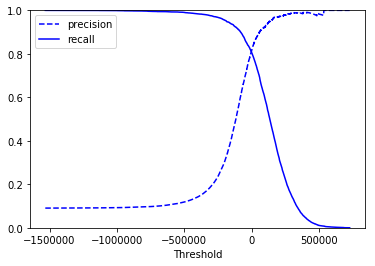

In [21]:
#next, let's plot the relationship between threshold values and precision and recall scores
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

y_decision_scores = cross_val_predict(SGDClassifier(random_state=42), x_train, y_train_5, cv=5, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_decision_scores)

def plot_precision_recall_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "b-", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc='upper left')
    plt.ylim([0, 1])
    
plot_precision_recall_threshold(precisions, recalls, thresholds)
plt.show()

In [38]:
#you can see the tradeoff between precision and recall when one value increase another will decrease

In [39]:
#now you can zoom in the graph and choose the threshold that appropriate to your work
#suppose your work is to classify images as it is safe for kid or not
#so you may want your classifier to have high precision 
#(high precision means when your model classify any image as safe for kid, it often do it correctly but sometimes it may ignore some safe image)

#so you decide that your model will have about 90% precision
#threshold you pick is 70000 
threshold = 70000

y_decision_scores = cross_val_predict(SGDClassifier(random_state=42), x_train, y_train_5, cv=3, method='decision_function')
y_pred_90 = (y_decision_scores > threshold)
precision = precision_score(y_train_5, y_pred_90)
recall = recall_score(y_train_5, y_pred_90)
print("model precision is ", precision)
print('model recall is',recall )

/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.

model precision is  0.9163916391639164
model recall is 0.614646744143147


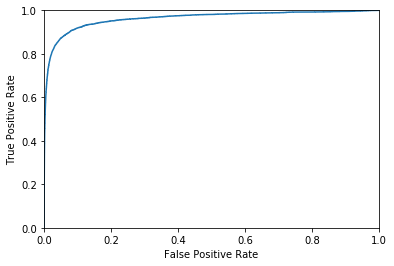

In [40]:
#Evaluate model performance using ROC curce
#ROC curve is a graph plotting True Positive Rate against False Positive Rate
#True Positive Rate (recall) tells you how many Positive instances your model classifies as Positive corrently
#False Positive Rate tells you how many Negative instances your model classifies as Positive incorrectly

#so high True Positive Rate is 'GOOD', high False Positive Rate is "BAD"
#so the perfect ROC curve has TPR = 1 and FPR = 0

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_decision_scores)
plot_roc_curve(fpr, tpr)

In [45]:
#the perfect model will have an area under the ROC curve equals to 1
#let's compute AUC of SGDClassifier
from sklearn.metrics import roc_auc_score
sgd_clf_auc_score = roc_auc_score(y_train_5, y_decision_scores)
print ("SGDClassifier has AUC score =", sgd_clf_auc_score)

SGDClassifier has AUC score = 0.9631198626163486


In [49]:
#let's create another model to compare auc score
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_proba_scores = cross_val_predict(forest_clf, x_train, y_train_5, cv=3, method='predict_proba')
forest_auc_score = roc_auc_score(y_train_5, forest_proba_scores[:, 1])
print("RandomForestClassifier auc score = ", forest_auc_score)
#since, RandomeForest Classifier doesn't has decision_function
#so we use predict_proba

/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomForestClassifier auc score =  0.9920369671477596


In [50]:
#RandomClassifier has auc score more than SGDClassifier

/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.

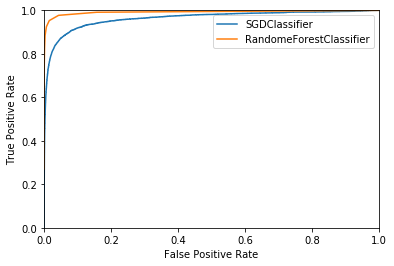

In [55]:
#let's plot both RandomForest and SGD Classifer ROC curve
sgd_decision_scores = cross_val_predict(SGDClassifier(random_state=42), x_train, y_train_5, cv=3, method='decision_function')
forest_proba_scores = cross_val_predict(RandomForestClassifier(random_state=42), x_train, y_train_5, cv=3, method='predict_proba')
sgd_fpr, sgd_tpr, sgd_thresholds = roc_curve(y_train_5, sgd_decision_scores)
forest_fpr, forest_tpr, thresholds = roc_curve(y_train_5, forest_proba_scores[:, 1])

plt.plot(sgd_fpr, sgd_tpr, label="SGDClassifier")
plt.plot(forest_fpr, forest_tpr, label="RandomeForestClassifier")
plt.axis([0, 1, 0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()